In [2]:
from readlif.reader import LifFile
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_2.lif"
# file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/codes_yunus/8hr_BTZ_image1.tif" # van internet

In [3]:
lif = LifFile(file_name)
image = lif.get_image(0)
num_z = image.dims.z
num_c = image.channels

channel_colors = ['inferno', 'magma', 'inferno', 'magma']  # 4 farklı renk paleti

# Experiment 35
# C0 = nucleus (c1/4)
# C1 = A11 (c2/4)
# C2 = HA (huntingtin) (c3/4)
# C3 = CCT1 (c4/4)
channel_names = ['Nucleus', 'A11', 'Huntingtin', 'CCT1']


# for c in range(num_c):
c = 1
# for z in range(num_z):
#     frame = image.get_frame(z=z, t=0, c=c)
#     plt.figure(figsize=(10, 10))  # <-- Büyük boyutlu figür
#     # plt.imshow(frame, cmap='inferno')
#     plt.imshow(frame, cmap=channel_colors[c])
#     plt.title(f"C: {c+1} ({channel_names[c+1]})   Z: {z}/{num_z}", fontsize=20)
#     plt.axis('off')
#     plt.show()

In [4]:
# threshold = 30000

# for z in range(num_z):
#     frame = image.get_frame(z=z, t=0, c=c)
#     frame_np = np.array(frame)  # 🔥 DÖNÜŞÜM BURADA

#     mask = frame_np > threshold
#     masked_frame = np.zeros_like(frame_np)
#     masked_frame[mask] = frame_np[mask]

#     plt.figure(figsize=(10, 10))
#     plt.imshow(masked_frame, cmap=channel_colors[c])
#     plt.title(f"Masked - C: {c} ({channel_names[c]})   Z: {z}/{num_z}", fontsize=20)
#     plt.axis('off')
#     plt.show()



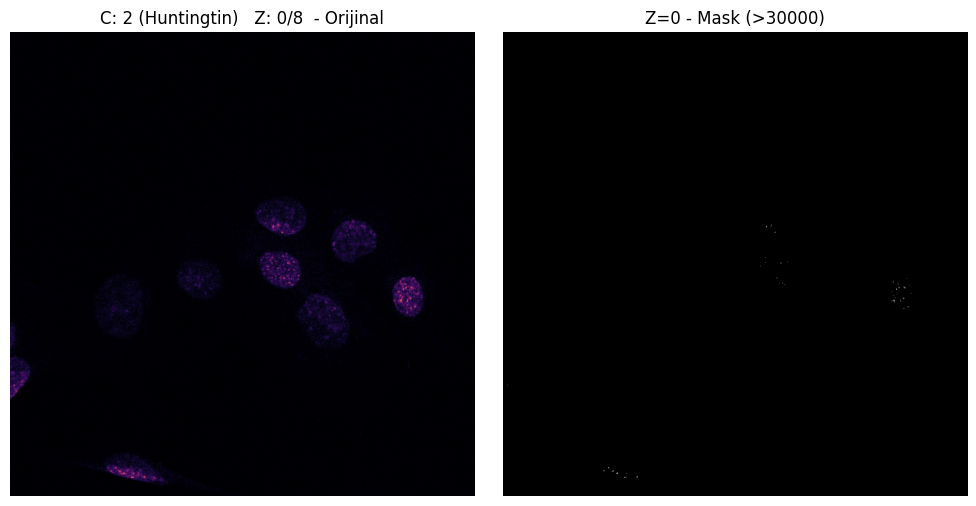

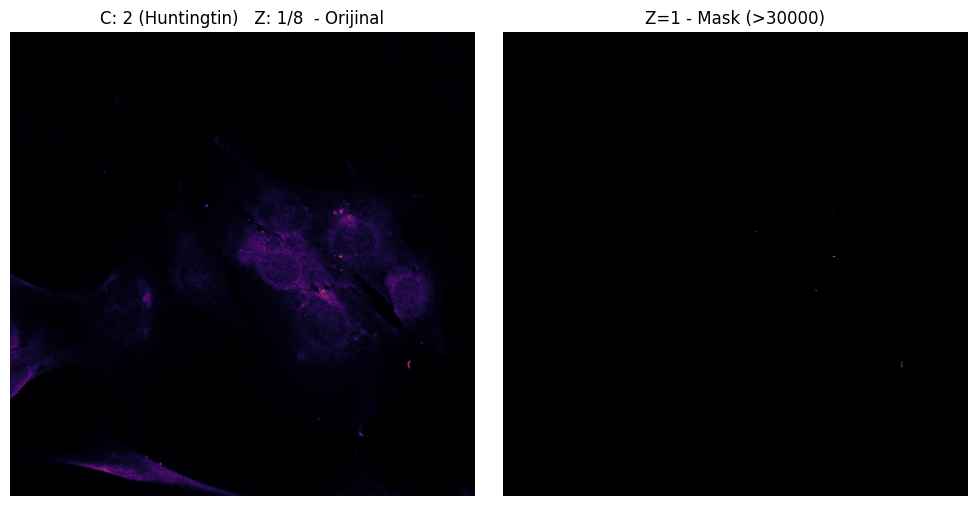

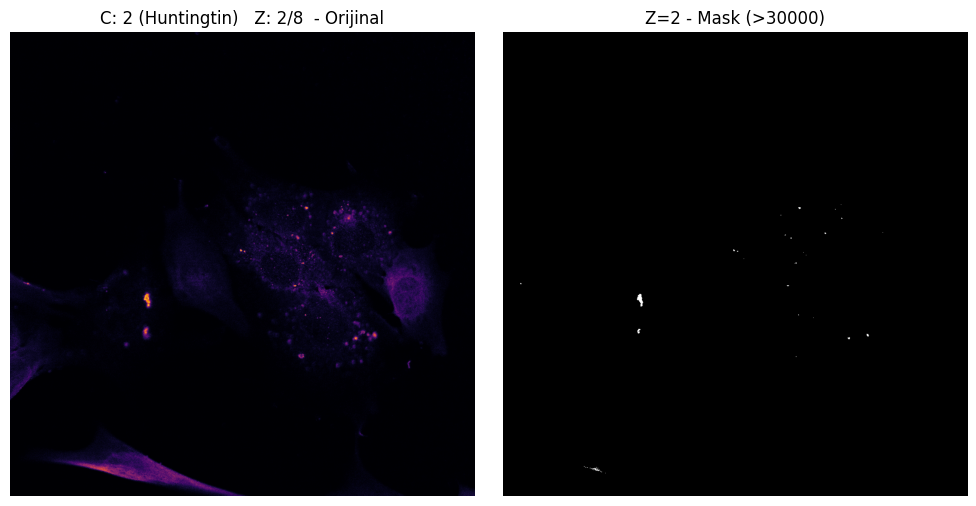

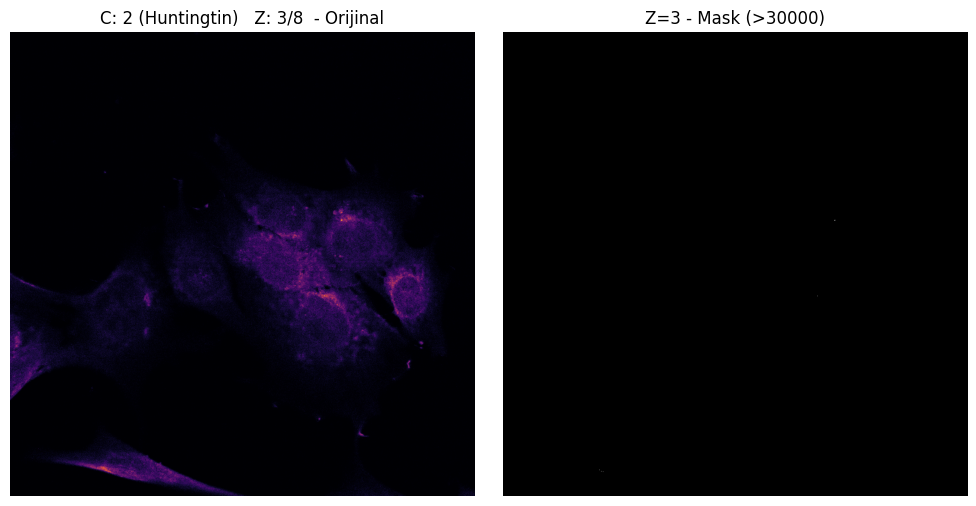

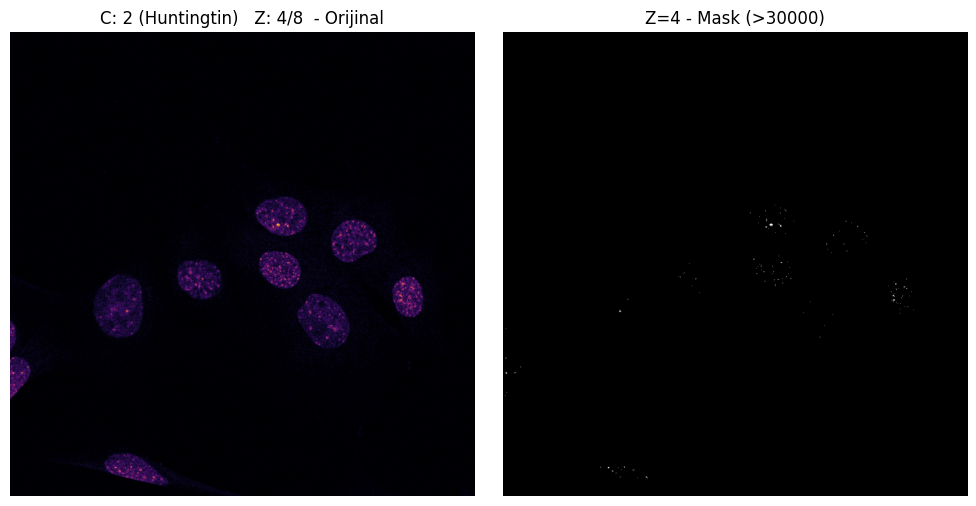

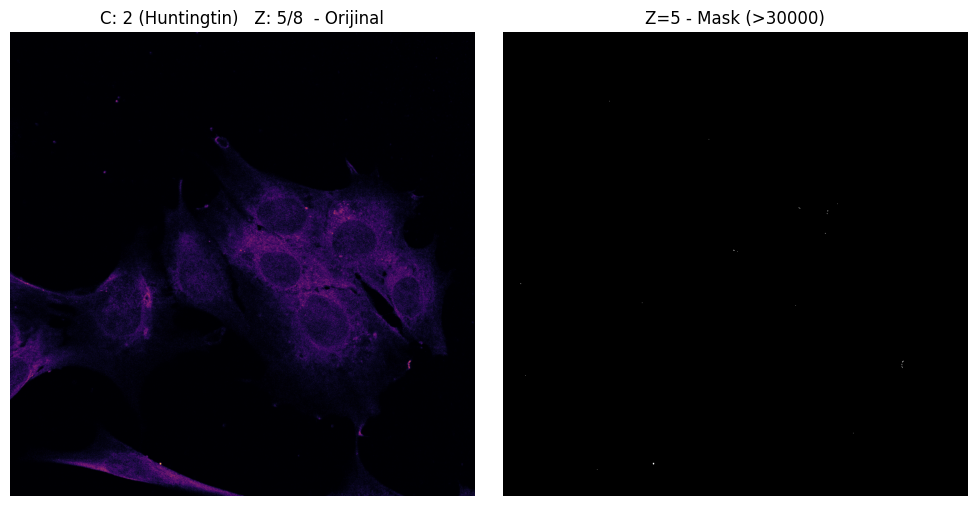

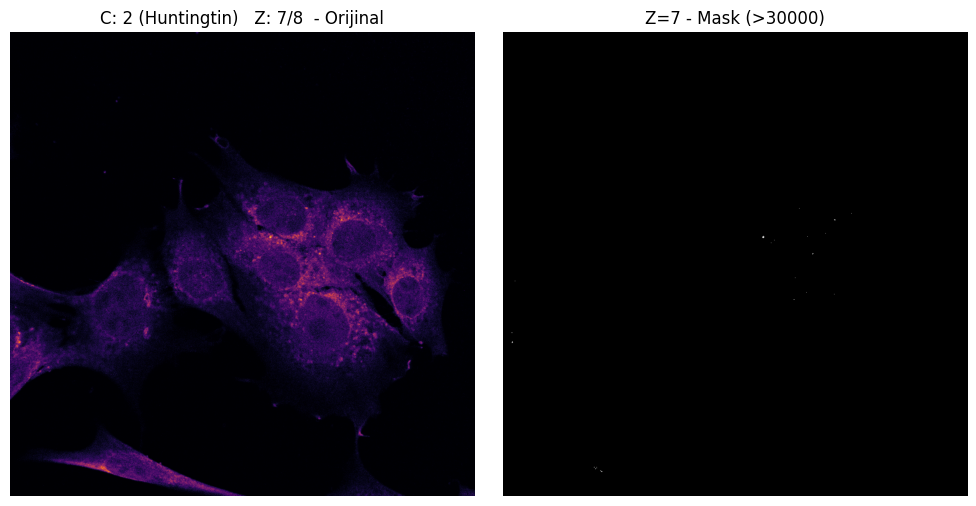

In [5]:
threshold = 30000

for z in range(num_z):
    frame = np.array(image.get_frame(z=z, t=0, c=c))
    mask = frame > threshold
    
    plt.figure(figsize=(10, 5))
    
    # Orijinal
    plt.subplot(1, 2, 1)
    plt.imshow(frame, cmap='inferno')
    plt.title(f"Z={z} - Orijinal")
    plt.title(f"C: {c+1} ({channel_names[c+1]})   Z: {z}/{num_z}  - Orijinal" )

    plt.axis('off')
    
    # Masked
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Z={z} - Mask (>{threshold})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [7]:
for z in range(num_z):
    print(f"Z={z}, mean intensity: {np.array(image.get_frame(z=z, t=0, c=c)).mean()}")

Z=0, mean intensity: 463.6587858200073
Z=1, mean intensity: 929.6412601470947
Z=2, mean intensity: 1022.0534076690674
Z=3, mean intensity: 1008.7818937301636
Z=4, mean intensity: 742.5088930130005
Z=5, mean intensity: 1721.2902221679688
Z=6, mean intensity: 1832.8527193069458
Z=7, mean intensity: 1759.4172916412354


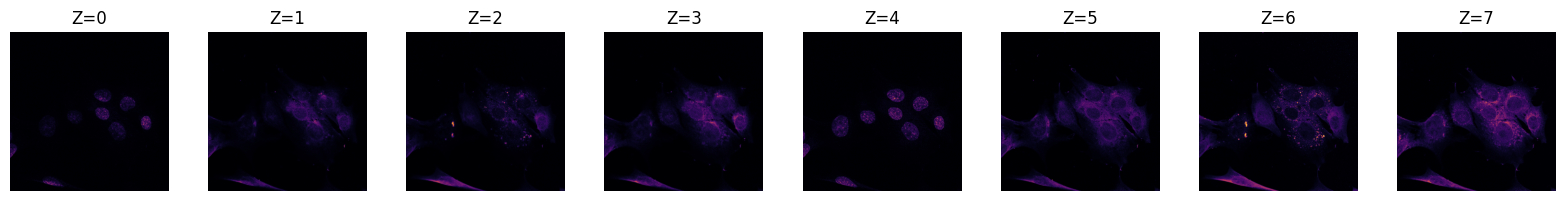

In [8]:
fig, axes = plt.subplots(1, num_z, figsize=(num_z * 2, 2))
for z in range(num_z):
    frame = np.array(image.get_frame(z=z, t=0, c=c))
    axes[z].imshow(frame, cmap='inferno')
    axes[z].axis('off')
    axes[z].set_title(f"Z={z}")
plt.tight_layout()
plt.show()


# 2D 
## All fotos combined and tuned to 2d image.

In [9]:
z_stack = []

for z in range(num_z):
    frame = np.array(image.get_frame(z=z, t=0, c=c))
    z_stack.append(frame)

# Maksimum projeksiyon
z_stack = np.array(z_stack)
max_proj = np.max(z_stack, axis=0)

# Threshold uygula
threshold = 40000
mask = max_proj > threshold

# Maske uygulanmış görüntü (görünen kısmı koru, geri kalanı sıfırla)
masked_img = np.zeros_like(max_proj)
masked_img[mask] = max_proj[mask]

# Görselleştir
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(max_proj, cmap='magma')
plt.title("Max Projection", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_img, cmap='magma')
plt.title(f"Thresholded (>{threshold})", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


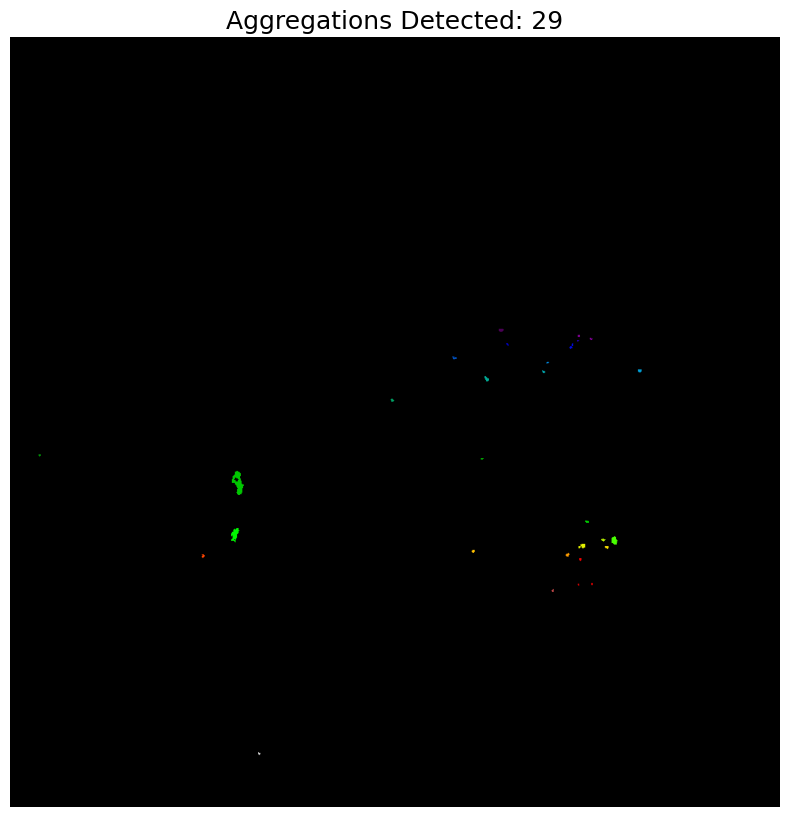

Total aggregations: 29


In [10]:
from skimage import measure, morphology

z_stack = [np.array(image.get_frame(z=z, t=0, c=c)) for z in range(image.dims.z)]
max_proj = np.max(z_stack, axis=0)

# Threshold uygula
threshold = 40000
mask = max_proj > threshold

# Küçük gürültüleri temizle (örn. 5 pikselden küçük)
clean_mask = morphology.remove_small_objects(mask, min_size=5)

# Bağlantılı bileşenleri etiketle
labeled_mask = measure.label(clean_mask)

# Aggregation sayısı
num_aggregations = labeled_mask.max()

# Görselleştir
plt.figure(figsize=(10, 10))
plt.imshow(labeled_mask, cmap='nipy_spectral')
plt.title(f"Aggregations Detected: {num_aggregations}", fontsize=18)
plt.axis('off')
plt.show()

print(f"Total aggregations: {num_aggregations}")


In [11]:
props = measure.regionprops(labeled_mask)
for i, prop in enumerate(props, 1):
    print(f"{i}. Aggregation - size: {prop.area}, locations: {prop.centroid}")


1. Aggregation - size: 23.0, locations: (np.float64(389.3478260869565), np.float64(652.6521739130435))
2. Aggregation - size: 9.0, locations: (np.float64(397.0), np.float64(756.0))
3. Aggregation - size: 8.0, locations: (np.float64(401.0), np.float64(772.25))
4. Aggregation - size: 5.0, locations: (np.float64(403.4), np.float64(754.8))
5. Aggregation - size: 8.0, locations: (np.float64(408.25), np.float64(661.125))
6. Aggregation - size: 18.0, locations: (np.float64(410.94444444444446), np.float64(746.2777777777778))
7. Aggregation - size: 13.0, locations: (np.float64(426.3076923076923), np.float64(590.5384615384615))
8. Aggregation - size: 6.0, locations: (np.float64(432.5), np.float64(714.5))
9. Aggregation - size: 18.0, locations: (np.float64(443.3333333333333), np.float64(837.0))
10. Aggregation - size: 10.0, locations: (np.float64(444.7), np.float64(709.2))
11. Aggregation - size: 26.0, locations: (np.float64(454.2307692307692), np.float64(633.4230769230769))
12. Aggregation - siz

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(max_proj, cmap='gray')

# Maskeyi renkli overlay olarak göster
plt.imshow(labeled_mask, cmap='nipy_spectral', alpha=0.4, norm=colors.Normalize(vmin=1, vmax=labeled_mask.max()))

plt.title(f"Original (grayscale) + Aggregations (colored mask)", fontsize=18)
plt.axis('off')
plt.show()


In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(max_proj, cmap='gray')

# Parlak sarı renkte maske overlay (örneğin)
plt.imshow(clean_mask, cmap='autumn', alpha=0.5)  # 'autumn' parlak sarı-turuncu tonlar verir

plt.title("Original (grayscale) + Aggregations (bright overlay)", fontsize=18)
plt.axis('off')
plt.show()


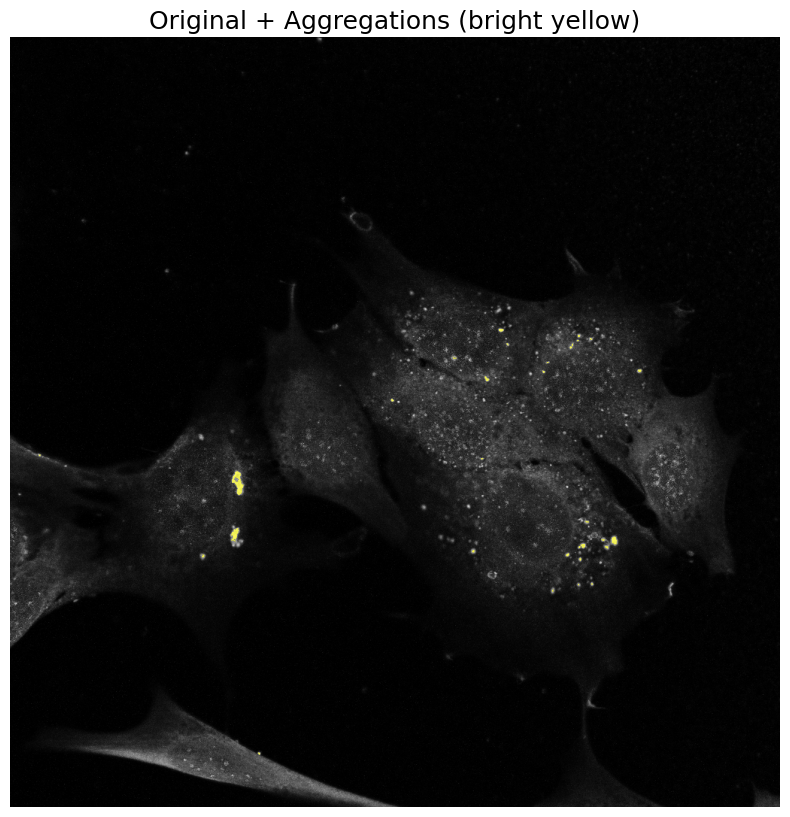

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(max_proj, cmap='gray')

# Sadece sarı maske
plt.imshow(clean_mask, cmap=colors.ListedColormap(['none', 'yellow']), alpha=0.6)

plt.title("Original + Aggregations (bright yellow)", fontsize=18)
plt.axis('off')
plt.show()


In [15]:
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, binary_closing, disk

# Örneğin, hücrelerin olduğu kanal C2'den max projeksiyon alındıysa:
# cell_channel = np.max(C2, axis=0)  # veya başka bir ön işlem sonrası görüntü
cell_channel = max_proj  # Zaten 2D

thresh = threshold_otsu(cell_channel)
cell_mask = cell_channel > thresh
cell_mask = remove_small_objects(cell_mask, min_size=200)
cell_mask = binary_closing(cell_mask, footprint=disk(3))


In [16]:
from skimage.segmentation import find_boundaries

# Hücre içindeki aggregation maskesi
agg_mask_inside = clean_mask & cell_mask  # sadece hücre içi

# Etiketle
labeled_inside = measure.label(agg_mask_inside)
num_inside = labeled_inside.max()

# Hücre sınırları (yeşil çizgi için)
boundaries = find_boundaries(cell_mask, mode='outer')

# Görsel
plt.figure(figsize=(10, 10))
plt.imshow(max_proj, cmap='gray')

# Sarı aggregation overlay (sadece hücre içindekiler)
plt.imshow(agg_mask_inside, cmap=colors.ListedColormap(['none', 'yellow']), alpha=0.9)

# Hücre sınırını yeşil çiz
plt.imshow(boundaries, cmap=colors.ListedColormap(['none', 'lime']), alpha=1.0)

plt.title(f"Aggregations in the cells: {num_inside}", fontsize=18)
plt.axis('off')
plt.show()

print(f"Total aggregation: {num_inside}")


Total aggregation: 28


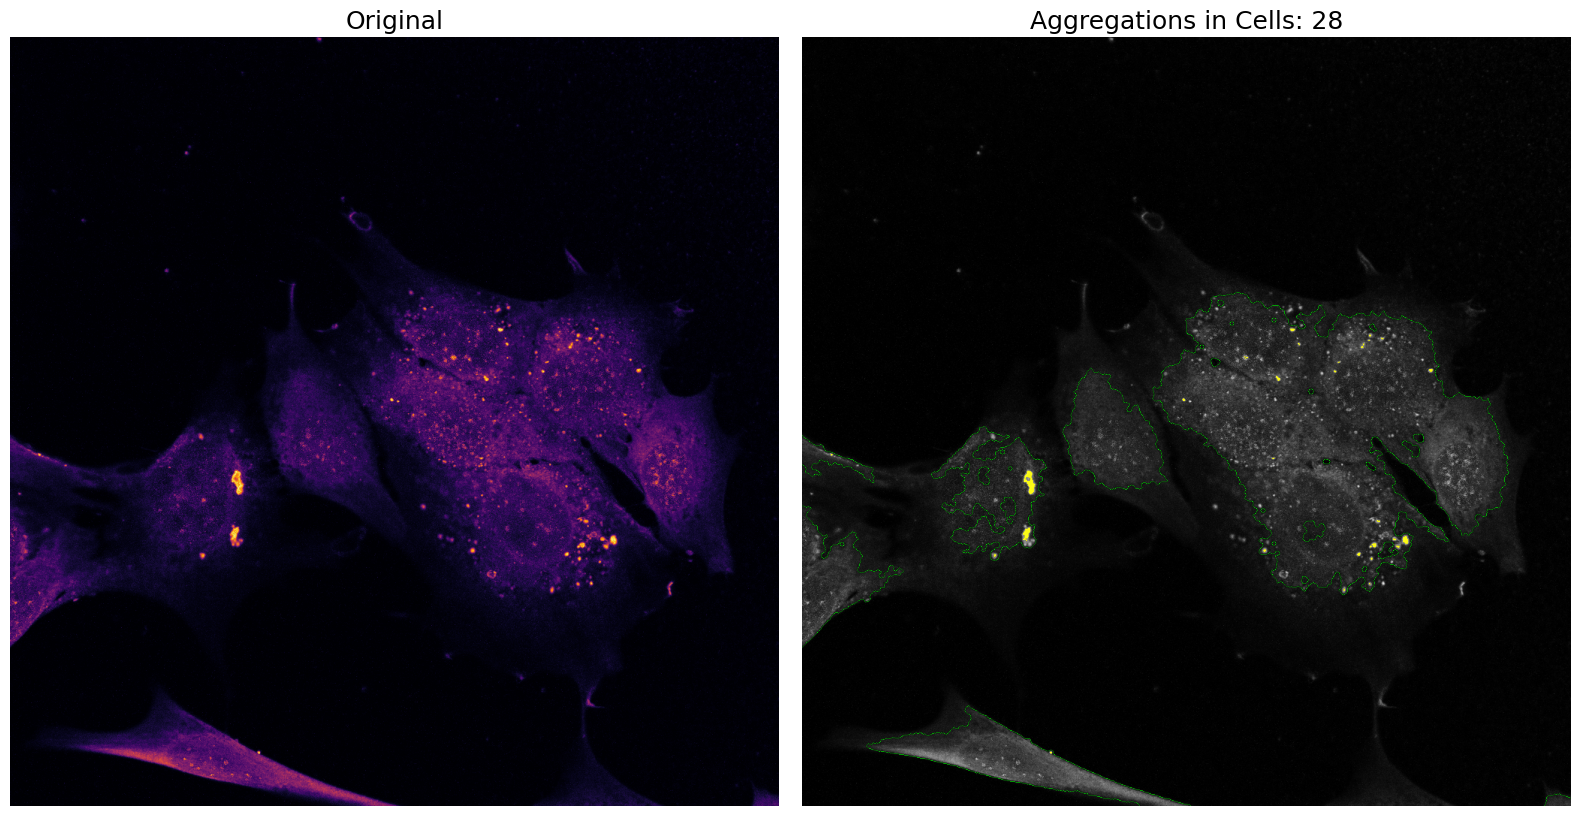

In [17]:
# C0: Nucleus kanalını al (mor gösterim için)
c0_frame = np.max([np.array(image.get_frame(z=z, t=0, c=1)) for z in range(num_z)], axis=0)

plt.figure(figsize=(16, 8))

# Sol panel: orijinal nucleus kanal (mor)
plt.subplot(1, 2, 1)
plt.imshow(c0_frame, cmap='inferno')  # veya 'Purples', 'plasma', vs.
plt.title("Original", fontsize=18)
plt.axis('off')

# Sağ panel: agregat maskesi + hücre sınırı
plt.subplot(1, 2, 2)
plt.imshow(max_proj, cmap='gray')  # HA kanal max projeksiyon

# Sarı maske: hücre içi agregatlar
plt.imshow(agg_mask_inside, cmap=colors.ListedColormap(['none', 'yellow']), alpha=0.9)

# Yeşil hücre sınırı
plt.imshow(boundaries, cmap=colors.ListedColormap(['none', 'lime']), alpha=1.0)

plt.title(f"Aggregations in Cells: {num_inside}", fontsize=18)
plt.axis('off')

plt.tight_layout()
plt.show()
